In [78]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import argparse
from sklearn import preprocessing
from sklearn.datasets.samples_generator import make_blobs

train_file = open('train.data')
test_file = open('test.data')

epochs = 50
seasons = 300
steps = 145

d_train = []
d_label = []
train_file.seek(0)
for line in train_file:
    line = line.rstrip('\n')
    lc = line.split(', ')
    line_l = [lc[0], lc[2], lc[4], lc[10], lc[11], lc[12]]
    d_train.append(line_l)
    if (lc[14] == '<=50K'):
        d_label.append(-1)
    else:
        d_label.append(1)
d_train = preprocessing.scale(d_train)
d_train = np.c_[np.ones(len(d_train)), d_train, d_label]
    
d_test = []
test_file.seek(0)
for line in test_file:
    line = line.rstrip('\n')
    lc = line.split(',')
    line_l = [lc[0], lc[2], lc[4], lc[10], lc[11], lc[12]]
    d_test.append(line_l)
d_test = preprocessing.scale(d_test)
d_test = np.c_[np.ones(len(d_test)), d_test]

d_train = np.array(d_train, dtype = float)
d_test = np.array(d_test, dtype = float)

print(d_train.shape)
print(d_test.shape)

(43958, 8)
(4884, 7)


In [94]:
lam = [1, 0.01, 0.0001, 0.000001]

accuracy_plot = []
magnitude_plot = []
weights = []

for l in lam:
    print('Start training... lam = %.5f' % l)
    weight = np.random.uniform(size = (len(d_train[0]) - 1))
    step_accu_history = []
    mag_history = []
    
    for i in range(epochs):
        if (i%10 == 0):
            print('Training epoch:', i, '~', i + 10, '...')
        np.random.shuffle(d_train)
        e_train = d_train[458:, 0:7]
        e_train_label = d_train[458:, 7:8].flatten()
        e_val = d_train[0:500, 0:7]
        e_val_label = d_train[0:500, 7:8].flatten()
        
        for j in range(seasons):
            for k in range(steps):
                step_len = 1/(0.1*i + 25)
                row_idx = j*steps + k
                row = e_train[row_idx]
                label = e_train_label[row_idx]
                pred = row.dot(weight) + bias
                if (label*pred >= 1):
                    weight = (1 - step_len*l)*weight
                else:
                    weight = weight - step_len*(l*weight - label*row)
#                     bias = bias + step_len*label
            if (j%30 == 0):
                preds_side = e_val.dot(weight)
                err_count = 0
                for n in range(len(e_val_label)):
                    if (preds_side[n]*e_val_label[n] < 0):
                        err_count += 1
                step_accu_history.append(1 - err_count/len(e_val_label))
                mag_history.append(la.norm(weight, 2))
        
    accuracy_plot.append(step_accu_history)
    magnitude_plot.append(mag_history)
    weights.append(weight)



Start training... lam = 1.00000
Training epoch: 0 ~ 10 ...
Training epoch: 10 ~ 20 ...
Training epoch: 20 ~ 30 ...
Training epoch: 30 ~ 40 ...
Training epoch: 40 ~ 50 ...
Start training... lam = 0.01000
Training epoch: 0 ~ 10 ...
Training epoch: 10 ~ 20 ...
Training epoch: 20 ~ 30 ...
Training epoch: 30 ~ 40 ...
Training epoch: 40 ~ 50 ...
Start training... lam = 0.00010
Training epoch: 0 ~ 10 ...
Training epoch: 10 ~ 20 ...
Training epoch: 20 ~ 30 ...
Training epoch: 30 ~ 40 ...
Training epoch: 40 ~ 50 ...
Start training... lam = 0.00000
Training epoch: 0 ~ 10 ...
Training epoch: 10 ~ 20 ...
Training epoch: 20 ~ 30 ...
Training epoch: 30 ~ 40 ...
Training epoch: 40 ~ 50 ...


0.7758679999999999
0.8037560000000001
0.805536
0.8075640000000001


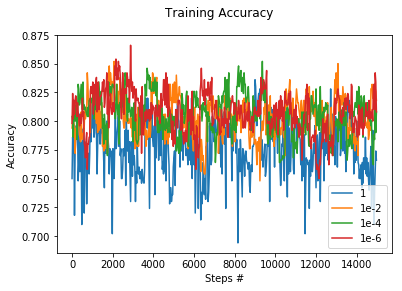

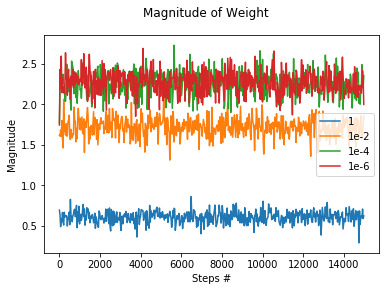

In [95]:
for i in range(len(accuracy_plot)):
    print(np.mean(accuracy_plot[i]))

fig = plt.figure()
for i in range(4):
    plt.plot(np.arange(0, len(accuracy_plot[i]))*30, accuracy_plot[i])
fig.suptitle('Training Accuracy')
plt.legend(['1', '1e-2', '1e-4', '1e-6'])
plt.xlabel("Steps #")
plt.ylabel("Accuracy")
plt.show()
fig = plt.figure()
for i in range(4):
    plt.plot(np.arange(0, len(magnitude_plot[i]))*30, magnitude_plot[i])
fig.suptitle('Magnitude of Weight')
plt.legend(['1', '1e-2', '1e-4', '1e-6'])
plt.xlabel("Steps #")
plt.ylabel("Magnitude")
plt.show()

In [93]:
import csv
res = [['Example', 'Label']]
ct = 0

preds_test = d_test.dot(weights[3])

for lb in preds_test:
    row = []
    row.append("'%s'" %ct)
    if (lb < 0):
        row.append('<=50K')
    else:
        row.append('>50K')
    res.append(row)
    ct += 1
with open("output3.csv",'w', newline='') as resultFile:
    wr = csv.writer(resultFile)
    wr.writerows(res)